In [1]:
import pandas as pd

col_names = ["submission_id", "session","date","level","code","server_error","client_error","version", "lang", "email", "username", "is_test", "demo", "start"]
df = pd.read_csv("../../Data/2-logs-plain-2.csv", names=col_names)
df = df.iloc[1:]

df = df.loc[df['demo'] != True]
df = df.loc[df['start'] != True]
df['level'] = pd.to_numeric(df.level, errors='coerce')
df = df.loc[df['level'] < 14]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
from tqdm.notebook import tqdm

grouped = df.groupby(["session", "level"])
consecutive_error_list = []
for name, group in tqdm(grouped):
    consecutive_error_counter = 0
    server_error_group = group['server_error'].tolist()
    for submission in server_error_group:
        if submission != "-":
            consecutive_error_counter += 1
        if submission == "-":
        #if submission == "-" and consecutive_error_counter >= 1: #so no error but previously there was one
            consecutive_error_list.append(consecutive_error_counter)
            consecutive_error_counter = 0

In [4]:
df_error_stats = pd.Series(consecutive_error_list)
df_error_stats_count = df_error_stats.value_counts()
df_error_stats_count = df_error_stats_count.reset_index()

df_error_stats_count.columns = ['attempts', 'frequency']
df_error_count = df_error_stats_count.sort_values(by='attempts', ascending=True)

print(df_error_count)
print(df_error_stats_count['attempts'].sum())
print(df_error_stats_count['attempts'].mean())
print(df_error_stats_count['attempts'].std())

    attempts  frequency
0          0     741379
1          1      24928
2          2       9656
3          3       4962
4          4       2796
..       ...        ...
68       138          1
69       161          1
63       165          1
81       171          1
64       515          1

[82 rows x 2 columns]
4299
52.426829268292686
63.481509019187676


    attempts  frequency
0          0     741379
1          1      24928
2          2       9656
3          3       4962
4          4       2796
..       ...        ...
68       138          1
69       161          1
63       165          1
81       171          1
64       515          1

[82 rows x 2 columns]
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]


Text(0, 0.5, 'Frequency')

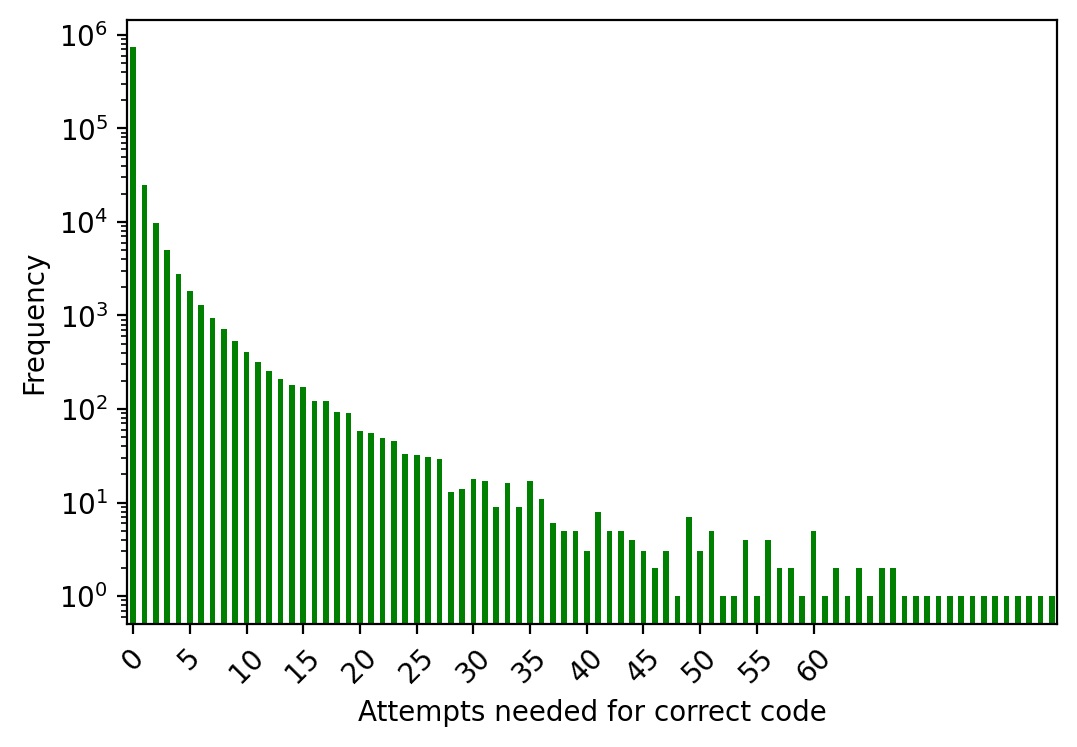

In [8]:
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
plt.rcParams['figure.dpi'] = 200

df_error = pd.Series(consecutive_error_list)
df_error_count = df_error.value_counts()
df_error_count = df_error_count.reset_index()

df_error_count.columns = ['attempts', 'frequency']
df_error_count = df_error_count.sort_values(by='attempts', ascending=True)


print(df_error_count)
#df_error_count = df_error_count = df_error_count.iloc[:-21]

tick_list = []
for i in range(0, 61, 5):
    tick_list.append(i)

print(tick_list)    
    
consecutive_error_plot = df_error_count.plot.bar(x='attempts', y='frequency', color='green', logy=True)
consecutive_error_plot.set_xlabel("Attempts needed for correct code")
consecutive_error_plot.set_xticks(tick_list)
consecutive_error_plot.set_xticklabels(tick_list, rotation=45)
consecutive_error_plot.tick_params(direction='out')
consecutive_error_plot.get_legend().remove()
consecutive_error_plot.set_ylabel("Frequency")